# Homework 3: DataFrames, Control Flow, and Probability

## Due Sunday, October 27th at 11:59PM

Welcome to Homework 3! This homework will cover lots of different topics:
- Grouping with subgroups (see [BPD 11](https://notes.dsc10.com/02-data_sets/groupby.html#subgroups))
- Merging DataFrames (see [BPD 13](https://notes.dsc10.com/02-data_sets/merging.html))
- Conditional statements (see [CIT 9.1](https://inferentialthinking.com/chapters/09/1/Conditional_Statements.html))
- Iteration (see [CIT 9.2](https://inferentialthinking.com/chapters/09/2/Iteration.html))
- Probability (see [CIT 9.5](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html))

### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (the schedule can be found [here](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

In [1]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

import numpy as np
import otter
grader = otter.Notebook()

# We need to import some extra packages for some fun demonstrations.
import json
from ipywidgets import interact, widgets
from IPython.display import YouTubeVideo, HTML, display, clear_output, Image, IFrame

# Don't worry about this.
def read_json(path):
    f = open(path, 'r')
    return json.load(f)

answer_words = bpd.read_csv('data/wordle.csv').get('word').values

def candy_map():
    src = f"https://map.candystore.com/halloween/2024/fullscreen.html"
    width = 800
    height = 600
    display(IFrame(src, width, height))

### Supplemental Video on DataHub and Jupyter Notebooks

In Lab 0, we linked you to a video that walks you through key ideas you should be aware of when working on DataHub and in Jupyter Notebooks, including
- how files are organized on DataHub
- what it means to "restart the kernel"
- how to use keyboard shortcuts (most important: use `SHIFT + ENTER` to run a cell!)

Now that you have some experience with Jupyter Notebooks, we're linking this video again for your convenience. If you feel a little shaky on how to work your way around a notebook or troubleshoot issues, we recommend you give it another watch. (When troubleshooting, make sure to always check the [Debugging](https://dsc10.com/debugging/) tab on the course website as well.)

The video is quite long, but if you open the video directly on YouTube (which you can do by clicking the video's title after it loads in the next cell) you'll see timestamps in the description which you can use to jump to different parts of the video depending on what you'd like to learn more about.

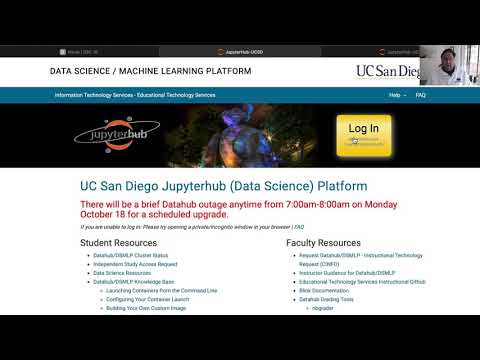

In [2]:
# Run this cell.
YouTubeVideo('Hq8VaNirDRQ')

## 0. Mid-Quarter Survey

We'd like to hear from you on how DSC 10 has been going so far this quarter. To do so, we've put together a survey that asks you to provide feedback on all aspects of the course. You can provide as much or as little detail as you'd like. We value your input and will use the results of the survey to improve the course!

This survey is entirely anonymous, though you are free to leave your name and email if you want. The responses to the survey will be visible to both course staff and the Data Science Student Representatives. There will also be a question at the end of the survey that will allow you to provide feedback on the DSC program as a whole.

<center><h3>Click <a href="https://forms.gle/wPLUUvWXKhkzGA5X6">here</a> to access the survey.</h3></center>

After completing the survey, enter the keyword provided at the end of the survey to get credit towards this homework assignment.

In [3]:
survey_keyword = "Padres"

In [4]:
grader.check("q0")

q0 results: All test cases passed!

## 1. 100 Years of "J" Baby Names 👶🏻

What letter does your first name start with? In this problem, we'll look at baby names starting with the letter "J". The file `data/baby_names.csv` contains information from the [Social Security Administration](https://www.ssa.gov/oact/babynames/limits.html) about "J" baby names in the US from 1924 to 2023 — that's one hundred years of data! Run the cell below to read in the data.

In [5]:
baby = bpd.read_csv('data/baby_names.csv')
baby

,State,Gender,Year,Name,Count
0,AK,M,1924,John,36
1,AK,M,1924,James,20
2,AK,M,1924,Joseph,10
3,AK,M,1924,Jack,5
4,AK,M,1924,Jacob,5
...,...,...,...,...,...
371885,WY,M,2023,Jaxon,7
371886,WY,M,2023,Jace,6
371887,WY,M,2023,Jason,6
371888,WY,M,2023,Joshua,6


The DataFrame `baby` has a row for each `'State'` (50 US states plus Washington DC), `'Gender'` (`'M'` or `'F'`, as assigned at birth), `'Year'` (between 1924 and 2023), and `'Name'`. The `'Count'` column records the number of babies of that gender who were given that name in one state in one year.

The first row in `baby` contains the name John. Below, we look at only the rows corresponding to the name John.

In [6]:
baby[baby.get('Name') == 'John']

,State,Gender,Year,Name,Count
0,AK,M,1924,John,36
24,AL,F,1924,John,15
39,AL,M,1924,John,1398
89,AR,F,1924,John,10
98,AR,M,1924,John,837
...,...,...,...,...,...
371644,VT,M,2023,John,7
371694,WA,M,2023,John,117
371782,WI,M,2023,John,94
371848,WV,M,2023,John,31


The first row of the DataFrame shows that there were 36 male babies named John born in Alaska in 1924. There are many other rows corresponding to the name John, which come from other years, other states, and also female babies named John, of which there are some!


Run the cell below to find out when and where many female Johns were born.

In [7]:
female_john = baby[(baby.get('Name') == 'John') & (baby.get('Gender') == 'F')]
female_john.sort_values(by='Count', ascending=False)

,State,Gender,Year,Name,Count
7727,NY,F,1927,John,56
9938,NY,F,1928,John,50
12153,NY,F,1929,John,48
1562,PA,F,1924,John,47
276946,KY,F,2004,John,45
...,...,...,...,...,...
132934,KY,F,1971,John,5
69640,LA,F,1952,John,5
69146,GA,F,1952,John,5
38117,VA,F,1940,John,5


**Question 1.1.** There are many more male Johns than female Johns, so let's look at the popularity of the name John in male babies over time. Create a line plot that shows how the number of male babies named John has changed over time in the US. Then use your plot to answer the question that follows.

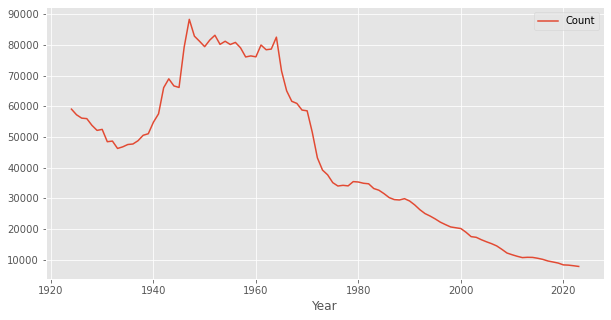

In [8]:
# Create your line plot here.
# first i want to query for two conditions: dude and john
# and then I wanna groupby year?
babyJohn =baby[(baby.get("Name")== 'John')&(baby.get("Gender")== 'M')].groupby("Year").sum()
babyJohn.plot(kind='line',y='Count');

Around what year was the peak in popularity for the name John in male babies? Choose the closest answer from the options below and set `male_john_peak` to 1, 2, 3, or 4 corresponding to your answer choice.
1. 1930
2. 1950
3. 1970
4. 1990

In [9]:
male_john_peak = 1

In [10]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** In the `baby` DataFrame, how many babies of each gender were born in each state? Create a DataFrame named `num_babies` with one row for each gender in each state and columns `'State'`, `'Gender'`, and `'Count'`, which contains the total number of babies of each gender in each state with a "J" name. The first few rows of `num_babies` are shown below.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>State</th>
      <th>Gender</th>
      <th>Count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>AK</td>
      <td>F</td>
      <td>15495</td>
    </tr>
    <tr>
      <th>1</th>
      <td>AK</td>
      <td>M</td>
      <td>44767</td>
    </tr>
    <tr>
      <th>2</th>
      <td>AL</td>
      <td>F</td>
      <td>191205</td>
    </tr>
    <tr>
      <th>3</th>
      <td>AL</td>
      <td>M</td>
      <td>555313</td>
    </tr>
  </tbody>
</table>

***Hints:***
- You can do this in one line of code.
- Don't forget to use `.reset_index()`.


In [11]:
num_babies = baby.groupby(['State','Gender']).sum().drop(columns='Year').reset_index()
num_babies
# baby.groupby(['State','Gender']).sum().drop(columns='Year').reset_index()

,State,Gender,Count
0,AK,F,15495
1,AK,M,44767
2,AL,F,191205
3,AL,M,555313
4,AR,F,110137
...,...,...,...
97,WI,M,494895
98,WV,F,104132
99,WV,M,255708
100,WY,F,17327


In [12]:
grader.check("q1_2")

q1_2 results: All test cases passed!

A gendered name is a combination of a name and a gender, such as female John. Let's explore the average age of people with each gendered name. For example, let's calculate the average age of all female Johns.

In [13]:
female_john

,State,Gender,Year,Name,Count
24,AL,F,1924,John,15
89,AR,F,1924,John,10
178,CA,F,1924,John,11
336,FL,F,1924,John,8
392,GA,F,1924,John,7
...,...,...,...,...,...
276946,KY,F,2004,John,45
280880,CA,F,2005,John,5
283955,NY,F,2005,John,5
284478,PA,F,2005,John,5


We'll define the age of a person as 2024 (the current year) minus the year in which the person was born. This doesn't take into account people's birthdays, because we don't have that information. For example, if a female John was born in 1984, they will be counted as 2024 - 1984 = 40 years old. Therefore the **total age** of all the female Johns is given below.

In [14]:
# age_column= 2024-female_john.get("Year")
# female_john = female_john.assign(Age = age_column)
# (female_john.get("Age")*female_john.get("Count")).sum()


In [15]:
#formula for average age: Cumulative Age / # of people

#think of this as a weighted mean
#what this does: LHS creates the age          RHS is the count of babies born that year with that name 
##                            multiplying age by count .sum() = the cumulative age
total_age = ((2024 - female_john.get('Year')) * female_john.get('Count')).sum()
total_age

933545

To find the average age, we need to know how many female Johns there are. The **total count** of female Johns is given below.

In [16]:
total_count = female_john.get('Count').sum()
total_count

13366

Therefore the **average age** of female Johns is given below.

In [17]:
average_age = total_age / total_count
average_age

69.84475534939398

Notice that we _cannot_ calculate the average age of female Johns as follows.

In [18]:
age = 2024 - female_john.get('Year')
age.mean()

68.21489526764934

This is incorrect because it does not take into account the fact that there were more female Johns born some years than others. 

**Question 1.3.** Create a DataFrame named `avg_age` that has one row for each gendered name and columns `'Gender'`, `'Name'`, and `'Average_Age'`, which contains the average age of all people with each gendered name. The first few rows of `avg_age` are shown below.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Gender</th>
      <th>Name</th>
      <th>Average_Age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>F</td>
      <td>Ja</td>
      <td>24.000000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>M</td>
      <td>Ja</td>
      <td>24.571429</td>
    </tr>
    <tr>
      <th>2</th>
      <td>F</td>
      <td>Jace</td>
      <td>10.451613</td>
    </tr>
    <tr>
      <th>3</th>
      <td>M</td>
      <td>Jace</td>
      <td>11.472549</td>
    </tr>
  </tbody>
</table>

***Hints:***
- Before attempting this question, make sure you understand the strategy shown above for finding the average age of female Johns. You will need to generalize this approach.
- This is a multi-step problem. Add cells and display your intermediate results so you can see your progress as you go.
- You should check that the average age for female Johns in your DataFrame `avg_age` is the same as we found above.


In [19]:
# baby[(baby.get('Name')=="Ja")&(baby.get("Gender")=='M')] #just checking that a male Ja exists

In [20]:
#find the average age of all people with gendered names.
#1st step  is finding the gendered names 
#2nd reset the index 
#3rd find the average (age * number of people =  cumulative total), then sum up allll the cumulative total and divide by count (count.sum())

# baby.get(['Name'])
# baby.groupby(['Gender','Name']).count()#.reset_index().groupby('Gender').count()
# baby.groupby('Name').count()

# testing.merge(baby.get(['Name']), on= "Name")

#what about sort by name?
# baby.sort_values(by = "Name").groupby(['Gender','Name']).count().reset_index().sort_values(by="Name")

testing = baby.groupby(['Gender','Name']).count().reset_index().sort_values(by= "Name")
testing = testing.drop(columns ='State')
# testing #this line gives us the format similar to the problem
# refer to thiss! to merge the two, next step is to find the average age for each gendered name

# i want total average age for that gendered name
# i need the total amount of what? cumulative age= age*count  divided by total count 

In [21]:
testing_merge = baby.groupby(['Gender','Name']).count().drop(columns= ["State","Year"])
# testing_merge.merge(baby, left_index =True, right_on = )
testing_merge

Count
Gender Name          
F      Ja           1
       Jace         6
       Jacey      583
       Jack        55
       Jackie    2820
...               ...
M      Justin    3429
       Justine    129
       Justis      46
       Justus     608
       Justyce      5

[502 rows x 1 columns]

In [22]:
baby[(baby.get('Name')=="Ja")&(baby.get("Gender")=='F')] #just checking that a male Ja exists

,State,Gender,Year,Name,Count
258970,VA,F,2000,Ja,6


In [134]:
# avg_age = baby.assing()
# avg_age

In [137]:
grader.check("q1_3")

q1_3 results:
    q1_3 - 1 result:
        Trying:
            isinstance(avg_age,bpd.DataFrame) and avg_age.shape == (502, 3) and 'Average_Age' in avg_age.columns and baby.shape == (371890, 5) # Don't change the original baby DataFrame.
        Expecting:
            True
        **********************************************************************
        Line 1, in q1_3 0
        Failed example:
            isinstance(avg_age,bpd.DataFrame) and avg_age.shape == (502, 3) and 'Average_Age' in avg_age.columns and baby.shape == (371890, 5) # Don't change the original baby DataFrame.
        Expected:
            True
        Got:
            False

    q1_3 - 2 result:
        Trying:
            np.isclose(avg_age[(avg_age.get('Name') == 'John') & (avg_age.get('Gender') == 'F')].get('Average_Age').iloc[0], 69.84475534939398)
        Expecting:
            True
        **********************************************************************
        Line 1, in q1_3 1
        Failed example:
            np.isclose(avg_age[(avg_age.get('Name') == 'John') & (avg_age.get('Gender') == 'F')].get('Average_Age').iloc[0], 69.84475534939398)
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_3 1[0]>", line 1, in <module>
                np.isclose(avg_age[(avg_age.get('Name') == 'John') & (avg_age.get('Gender') == 'F')].get('Average_Age').iloc[0], 69.84475534939398)
            AttributeError: 'ellipsis' object has no attribute 'get'

## 2. Trick or Treat 🍭🎃

In this question, we'll be exploring some data on the most popular Halloween candies in each state, from [this article](https://www.candystore.com/blogs/facts-trivia/halloween-candy-map-popular?y=2024).

Run the cell below to see a fun interactive data visualization from the same article. Try hovering over your favorite state.

In [25]:
candy_map()

In [26]:
states = bpd.read_csv('data/popular_candy_by_state.csv')
states

,State,Top Candy,Pounds
0,AK,Sour Patch Kids,"5,171"
1,AL,Skittles,"111,332"
2,AR,Butterfinger,"217,714"
3,AZ,Hershey Kisses,"831,193"
4,CA,M&M's,"1,375,652"
...,...,...,...
46,VT,M&M's,"39,138"
47,WA,M&M's,"175,931"
48,WI,Butterfinger,"108,910"
49,WV,Hershey's Mini Bars,"41,213"


In the `states` DataFrame above, each state's `'Top Candy'` is recorded, based on candy sales in that state. `'Pounds'` refers to the total pounds of that specific candy sold in that state.<br>

The `states` DataFrame does not contain any information about the candies themselves, e.g. which candies are chocolate and which candies are fruity. For this information, we can refer to a dataset curated by FiveThirtyEight for their article [The Ultimate Halloween Candy Power Ranking](https://fivethirtyeight.com/videos/the-ultimate-halloween-candy-power-ranking/), which we recommend reading!

Run the cell below to load in a dataset containing information about many varieties of candy and save it as a DataFrame named `varieties`.

_Note_: The column in `varieties` that contains the names of the candies is `'competitorname'`, because these candies were all competing against each other in FiveThirtyEight's Halloween Candy Power Ranking. 

In [27]:
varieties = bpd.read_csv('data/halloween_candy.csv')
varieties

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One Dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One Quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welchs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werthers Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


**Question 2.1.** Using the `merge` method, combine the `states` and `varieties` DataFrames, and assign the resulting DataFrame to the variable `states_and_varieties`. 
- `states_and_varieties` should contain all of the columns in both `states` and `varieties`, minus the `'competitorname'` column from `varieties`, which is redundant with the `'Top Candy'` column from `states`.
- Sort `states_and_varieties` by `'State'` in ascending order.


<!--
BEGIN QUESTION
name: q2_1
-->

In [126]:
states_and_varieties = states.merge(varieties,left_on='Top Candy',right_on= "competitorname")
states_and_varieties = states_and_varieties.drop(columns = 'competitorname').sort_values(by="State")
states_and_varieties

,State,Top Candy,Pounds,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,AK,Sour Patch Kids,"5,171",0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
7,AL,Skittles,"111,332",0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140
8,CT,Almond Joy,"3,108",1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
1,DE,Sour Patch Kids,"21,013",0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
10,ID,Snickers,"89,399",1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,NJ,Tootsie Pops,"153,330",1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651
5,NY,Sour Patch Kids,"174,655",0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
11,TN,Snickers,"60,583",1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
6,TX,Sour Patch Kids,"973,833",0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998


In [87]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** If you completed Question 2.1 correctly, you'll notice that `states_and_varieties` has fewer rows than both `states` and `varieties`. This is because there are some candies that are in `states` and not in `varieties`, and other candies that are in `varieties` and not in `states`. 

Below, assign `states_not_varieties` to the number of different candies that are in `states` and not in `varieties`. Similarly, assign `varieties_not_states` to the number of different candies that are in `varieties` and not in `states`.

_Hint_: There are two ways to find the number of unique values in a column.

1. Group by that column. On the resulting DataFrame, use `.shape[0]`.

2. Use the `.unique()` method on the Series corresponding to that column. Use `len` on the resulting array.

You'll need to do this three times – once each for the columns that contain candy names in `states`, `varieties`, and `states_and_varieties`.



In [118]:
candies_in_states= states.get('Top Candy').unique()
candies_in_varieties= np.array(varieties.get('competitorname'))
not_in_var = []
for i in range(len(candies_in_states)):
    if candies_in_states[i] not in candies_in_varieties:
        not_in_var.append(candies_in_states[i])
not_in_var
not_in_states = []
for i in range(len(candies_in_varieties)):
    if candies_in_varieties[i] not in candies_in_states:
        not_in_states.append(candies_in_varieties[i])
len(not_in_states)

75

In [121]:
states_not_varieties = len(not_in_var)
varieties_not_states = len(not_in_states)
print('There are', states_not_varieties, 'candies in `states` that are not in `varieties`.')
print('There are', varieties_not_states, 'candies in `varieties` that are not in `states`.')

There are 8 candies in `states` that are not in `varieties`.
There are 75 candies in `varieties` that are not in `states`.


In [122]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Now that we better understand how `states_and_varieties` came to be, let's use it to learn more about states' candy preferences.

In [123]:
states_and_varieties

,State,Top Candy,Pounds,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,AK,Sour Patch Kids,"5,171",0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
7,AL,Skittles,"111,332",0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140
8,CT,Almond Joy,"3,108",1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
1,DE,Sour Patch Kids,"21,013",0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
10,ID,Snickers,"89,399",1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,NJ,Tootsie Pops,"153,330",1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651
5,NY,Sour Patch Kids,"174,655",0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
11,TN,Snickers,"60,583",1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
6,TX,Sour Patch Kids,"973,833",0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998


The 0s and 1s in the columns `'chocolate'`, `'fruity'`, `'caramel'`, etc. can be interpreted as Boolean values. For instance, since the state `'CT'` has a 1 in its `'chocolate'` column, it means that Connecticut's most popular candy includes chocolate.

**Question 2.3.** Among just the states in `states_and_varieties` where the most popular candy includes chocolate, what proportion of these states have a most popular candy that also includes caramel? Assign your answer to `p_caramel_given_chocolate`. It should be a decimal between 0 and 1.

<!--
BEGIN QUESTION
name: q2_3
-->

In [131]:
p_caramel_given_chocolate = states_and_varieties[states_and_varieties.get('caramel')==1].shape[0]/states_and_varieties.shape[0]
p_caramel_given_chocolate

0.15

In [132]:
grader.check("q2_3")

q2_3 results: All test cases passed!

## 3. Wordle 🟨 ⬛ 🟨 🟩 ⬛


<img src = "data/wordle_example.jpg" width=200>

[Wordle](https://www.nytimes.com/games/wordle/index.html), now owned by The New York Times, is a word-guessing game that became extremely popular at the end of 2021. Players have six tries to guess an unknown five-letter answer word. To play, you first enter a five-letter word as a guess for the answer word. After you make your guess, each letter of your guess will be highlighted with a color-coded square as follows:

- A black square ⬛ means that this letter is **not** in the answer word at all.  
- A yellow square 🟨 means that this letter is in the answer word, but in a **different position**.  
- A green square means 🟩 the letter is in the **correct position** in the answer word.

In this question, you will replicate some of that behavior using `for`-loops. We'll make a simplifying assumption that's not present in the real Wordle game: the answer word will always have five **different** letters and every guess must also have five **different** letters.

We'll represent your Wordle results with a string of five colored square emojis. (Emojis can be included in strings, just like letters, numbers, and punctuation!)

For example, if the answer word is `'STEIN'` and your guess is `'SCALE'`, as shown in the image above, your results can be represented by the string `'🟩⬛⬛⬛🟨'`. 

The array `emojis` defined below contains all the symbols we'll need to construct such strings.

In [35]:
emojis = np.array(['⬛', '🟨', '🟩'])
emojis

array(['⬛', '🟨', '🟩'], dtype='<U1')

Recall, in [Lecture 10](https://dsc10.com/resources/lectures/lec10/lec10.html), we introduced the accumulator pattern. In the coin-flipping example, we started with an empty array, and added onto it in each iteration of our `for`-loop.

We can also use the accumulator pattern for strings, by starting with an empty string, and repeatedly adding onto it via concatenation. Here's an example that loops through the letters in a word and replaces certain letters with colored square emojis.

In [36]:
output = ''
for ch in 'goodbye':
    if ch == 'b':
        output = output + emojis[0] # add a black square
    elif ch == 'y':
        output = output + emojis[1] # add a yellow square
    elif ch == 'g':
        output = output + emojis[2] # add a green square
        
    else:
        output = output + ch
output

'🟩ood⬛🟨e'

In the above example, we started with an empty string, `output`. For each character of the string `'goodbye'`, we added a single new character to `output`, depending on whether we saw `'g'`, `'b'`, `'y'`, or something else.

**Question 3.1.** Now, complete the implementation of the function `emojify`, which takes as input two five-letter strings, each having no repeated letters. The first input string, `guess`, should be cross-checked with each letter of the second input string, `answer`. The function should return a new string, formed entirely of emojis from  the `emojis` array, that indicates the accuracy of each letter in the guess, as described in the rules above. For example, let's say the `answer` string is `'shark'`. Here is how the function would work on various example guesses.

```py
>>> emojify('crept', 'shark')
'⬛🟨⬛⬛⬛'

>>> emojify('chalk', 'shark')
'⬛🟩🟩⬛🟩'

>>> emojify('harks', 'shark')
'🟨🟨🟨🟨🟨'

>>> emojify('sharp', 'shark')
'🟩🟩🟩🟩⬛'

>>> emojify('shark', 'shark')
'🟩🟩🟩🟩🟩'
```

_Note_: As we did in the preceding example, use the array `emojis` to access the emojis – don't actually include any colored square emojis in the code you write below.

***Hints:*** 
- Look at the slide titled *Ranges* in [Lecture 10](https://dsc10.com/resources/lectures/lec10/lec10.html#Ranges) for guidance.
- You'll need to use the `in` keyword, which we also introduced in Lecture 10.
- Remember to write a general function that works for any answer word, not just `'shark'`.

In [40]:
# emojis[2]

In [51]:
def emojify(guess, answer):
    # This line ensures your code works correctly regardless of 
    # whether the guess is in upper case or lower case.
    guess = guess.lower()

    # Empty string to add on to.
    emoji_output_string = '' 
    
    # You'll need to complete the body of this for loop.
    for i in range(len(guess)):
        if (guess[i] in answer) and (guess[i]==answer[i]):
            emoji_output_string += emojis[2]
        elif (guess[i] in answer) and (guess[i]!= answer[i]):
            emoji_output_string += emojis[1]
        else:
            emoji_output_string += emojis[0]
            
    # Don't change this
    return emoji_output_string

# An example call to emojify. Try out some other words, too.
emojify('spark', 'shark')

'🟩⬛🟩🟩🟩'

In [52]:
grader.check("q3_1")

q3_1 results: All test cases passed!

### Final Product

You just implemented the logic for a Wordle game. Let's try it out! 

Run the following cell once you've completed the rest of this question, and you'll see a text box. Type a five-letter word with no repeated letters to guess the secret answer word. You can change your guess by backspacing and typing in a different guess for the same answer word. 

You can play the game more than once by running the cell again to generate a new answer word.

In [54]:
answer = np.random.choice(answer_words)
def emojify_live(guess):
    result = emojify(guess, answer)
    display(HTML('<h3>' + result + '</h3>'))
    if result == '🟩🟩🟩🟩🟩':
        display(HTML('<h3> You win! </h3>'))
display(HTML('<h2> Let\'s play Wordle! </h2>'))
interact(emojify_live, guess="");

interactive(children=(Text(value='', description='guess'), Output()), _dom_classes=('widget-interact',))

## 4. Alternating Products

In this problem, we'll define two functions that compute some sort of "alternating product" of a sequence of values.

**Question 4.1.** Complete the implementation of the function `alternating_product`, which takes in an array of numbers, `values`, and returns the product of every other element in `values`, starting with the first element (at position `0`). Example behavior is shown below.

```py
>>> alternating_product(np.array([2, 3.5, 1, 1.5]))
2.0 # comes from 2 * 1

>>> alternating_product(np.array([2, 3.5, 1, 1.5, 4.5]))
9.0 # comes from 2 * 1 * 4.5
```
<!--
BEGIN QUESTION
name: q4_1
-->

In [70]:
def alternating_product(values):
    product =1
    #if its odd do the 0th term all the way to the n-1 term, incrementing by 2
    #if its even do the 0th term all the way to nth term incrementing by 2
    if (len(values)%2)==1:
        for i in np.arange(0,len(values),2):
            product *= values[i]
    else:
        for i in np.arange(0,len(values),2):
            product *= values[i]
    return product
    
# Feel free to change this input to make sure your function works correctly.
alternating_product(np.array([2, 3.5]))

2.0

In [69]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** In math, the word "alternating" is also used to describe sequences of numbers where the signs oscillate back and forth between positive and negative. Complete the implementation of the function `alternating_sign_product`, which takes in an array of positive numbers, `values`, and returns the product of every element in `values`, with alternating signs, starting with a positive sign for element `0`, a negative sign for element `1`, and so on. Example behavior is shown below.

```py
>>> alternating_sign_product(np.array([2, 3.5, 1]))
-7.0 # comes from 2 * (-3.5) * 1

>>> alternating_sign_product(np.array([2, 3.5, 1, 1.5]))
10.5 # comes from 2 * (-3.5) * 1 * (-1.5)
```

***Hint:*** If `x` is an integer, `x % 2` evaluates to 0 when `x` is even and to 1 when `x` is odd. If `x` represents the position of an element in the array, you can use this to help you figure out whether the sign should be positive or negative.

<!--
BEGIN QUESTION
name: q4_2
-->

In [76]:
def alternating_sign_product(values):
    product =1
    #if its odd do the 0th term all the way to the n-1 term, incrementing by 2
    #if its even do the 0th term all the way to nth term incrementing by 2
    if (len(values)%2)==1:
        for i in np.arange(0,len(values)):
            product *= values[i]
        product *= -1
    else:
        for i in np.arange(0,len(values)):
            product *= values[i]
    return product
    
# Feel free to change this input to make sure your function works correctly.
alternating_sign_product(np.array([2, 3.5, 1,2,1/2]))

-7.0

In [72]:
grader.check("q4_2")

q4_2 results: All test cases passed!

## 5. Lucky Triton Lotto 🔱 🎱 

Suppose UCSD holds an annual lottery called the Lucky Triton Lotto, where students can enter to win Triton Cash, or even free housing! Here's how the Lucky Triton Lotto works:

- First, you pick five **different** numbers, one at a time, from 1 to 29, representing that according to [USNews](https://www.usnews.com/best-colleges/university-of-california-san-diego-1317), UCSD is ranked 29th in the nation for best universities to attend for 2024-2025.
- Then, you separately pick a number from 1 to 12. This is because UCSD's Data Science program is ranked 12th in [USNews's](https://www.usnews.com/best-colleges/rankings/computer-science/data-analytics-science) best undergraduate Data Science programs list (though we think it's number one). Let's say you select 3.
- The six numbers you have selected, or  **your numbers**, can be represented all together as (7, 12, 24, 15, 13, 3). This is a _sequence_ of six numbers – **order matters**!

The **winning numbers** are chosen by King Triton drawing five balls, one at a time, **without replacement**, from a pot of white balls numbered 1 to 29. Then, he draws a gold ball, the Tritonball, from a pot of gold balls numbered 1 to 12. Both pots are completely separate, hence the different ball colors. For example, maybe the winning numbers are (15, 9, 24, 23, 1, 3).

We’ll assume for this problem that in order to win the grand prize (free housing), all six of your numbers need to match the winning numbers and be in the **exact same order**. In other words, your entire sequence of numbers must be exactly the same as the sequence of winning numbers. However, if some numbers in your sequence match up with the corresponding number in the winning sequence, you will still win some Triton Cash. 

Suppose again that you select (7, 12, 24, 15, 13, 3) and the winning numbers are (15, 9, 24, 23, 1, 3). In this case, two of your numbers are considered to match two of the winning numbers. 
- Your numbers: (7, 12, **24**, 15, 13, **3**)
- Winning numbers: (15, 9, **24**, 23, 1, **3**)

You won't win free housing, but you will win some Triton Cash. Note that although both sequences include the number 15 within the first five numbers (representing a white ball), since they are in different positions, that's not considered a match.


**Question 5.1.** What is the probability that your Tritonball number (the last number in your sequence) matches the winning Tritonball number? Calculate your answer and assign it to `tritonball_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

In [77]:
tritonball_chance = 1/12
tritonball_chance

0.08333333333333333

In [78]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 5.2.** What is the probability that your first three numbers match the first three winning numbers? Calculate your answer and assign it to `first_three_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

***Hint:*** You need **all three** of the first three numbers to match. What probability rule should you use?

In [79]:
first_three_chance = 1/(29*28*27)
first_three_chance

4.5612114577631816e-05

In [80]:
grader.check("q5_2")

q5_2 results: All test cases passed!

**Question 5.3.** What is the probability that you win the grand prize, free housing? Calculate your answer and assign it to `free_housing_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

***Hint:*** When you select a ball without replacement, what happens to the total number of balls you can select next time?

In [81]:
free_housing_chance = 1/(29*28*27*26*25*12)
free_housing_chance

5.8477069971322845e-09

In [82]:
grader.check("q5_3")

q5_3 results: All test cases passed!

**Question 5.4.** What is the probability that you do **not** win free housing? Calculate your answer and assign it to `no_free_housing_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

In [83]:
no_free_housing_chance = 1-free_housing_chance
no_free_housing_chance

0.999999994152293

In [84]:
grader.check("q5_4")

q5_4 results: All test cases passed!

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
1. Read through the notebook to make sure everything is fine and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

In [ ]:
grader.check_all()